<a href="https://colab.research.google.com/github/AmiMunshi/BPSK-TX-RX/blob/master/RouletteWheelSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Enter the chromosome name/number and the corresponding fitness value

chromosome= [name for name in input().split()]
fitness= [float(f) for f in input().split() ]

A B C D E
12 20 25 10 33


In [ ]:
#Convert both the lists to ndarray
chromosome= np.array(chromosome)
fitness= np.array(fitness)

In [ ]:
#Find the sum of fitness values, pdf, cdf

summation = np.sum(fitness) #Sum of all the fitness values
pdf= fitness/summation #pdf of all the fitness values
cdf= np.zeros(len(fitness))
cdf[0]= pdf[0]
for i in range(1, len(fitness)):
  cdf[i]=cdf[i-1]+pdf[i]

print(pdf)
print(cdf)

[0.12 0.2  0.25 0.1  0.33]
[0.12 0.32 0.57 0.67 1.  ]


In [ ]:
df= pd.DataFrame(data= [chromosome, fitness, pdf, cdf]) #make a data frame from individual numpy arrays

In [ ]:
print(df)

      0     1     2    3    4
0     A     B     C    D    E
1    45    12    13   20   10
2  0.45  0.12  0.13  0.2  0.1
3  0.45  0.57   0.7  0.9    1


In [ ]:
#Taking transpose of the data frame and giving column names
df=df.transpose() 
df.columns=["Chromosome", "Fitness", "PDF", "CDF"]


In [ ]:
df.head()

,Chromosome,Fitness,PDF,CDF
0,A,45,0.45,0.45
1,B,12,0.12,0.57
2,C,13,0.13,0.7
3,D,20,0.2,0.9
4,E,10,0.1,1


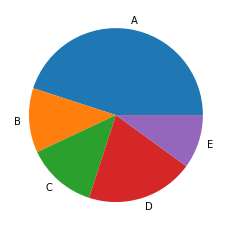

In [ ]:
plt.pie(df["Fitness"], labels=df["Chromosome"]) #Plot the fitness column
plt.show()

<BarContainer object of 5 artists>

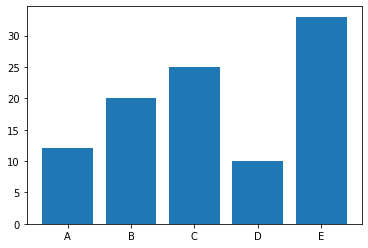

In [ ]:
plt.bar(chromosome,fitness)

In [ ]:
r= round(np.random.uniform(0,1),2)
print(r)

0.14


In [ ]:
#Roulette Wheel Algorithm

if r< df["CDF"][0]:
  print("Select ", df["Chromosome"][0])
else:
  for i in range (1,len(fitness)):
    if df["CDF"][i-1] < r <= df["CDF"][i]:
      print("Select", df["Chromosome"][i])
      break


Select  A


In [ ]:
#Generate range of random numbers  

r= [round(num,2) for num in np.random.uniform(0,1,20)]
print(r)

[0.59, 0.97, 0.79, 0.69, 0.41, 0.22, 0.31, 0.58, 0.67, 0.26, 0.31, 0.23, 0.45, 0.83, 0.13, 0.28, 0.84, 0.34, 0.23, 0.59]


In [ ]:
#obtain the selection using Roulette Wheel Algorithm for 10 random samples
selection=[]
for value in r:
  if value< df["CDF"][0]:
    selection.append(df["Chromosome"][0])
  else:
    for i in range (1,len(fitness)):
      if df["CDF"][i-1] < value <= df["CDF"][i]:
        selection.append(df["Chromosome"][i])
        break
print(selection)
print(selection.count("A"))

['C', 'E', 'D', 'C', 'A', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'D', 'A', 'A', 'D', 'A', 'A', 'C']
10
